In [30]:
import numpy as np
import matplotlib.pyplot as plt
import hdf5storage
import torch
test_x = torch.from_numpy(hdf5storage.loadmat('./data/PDvsNC/datas/test_PDvsNC_x_1.mat')['x'])
print(test_x.shape)

torch.Size([178, 1, 128, 128, 128])


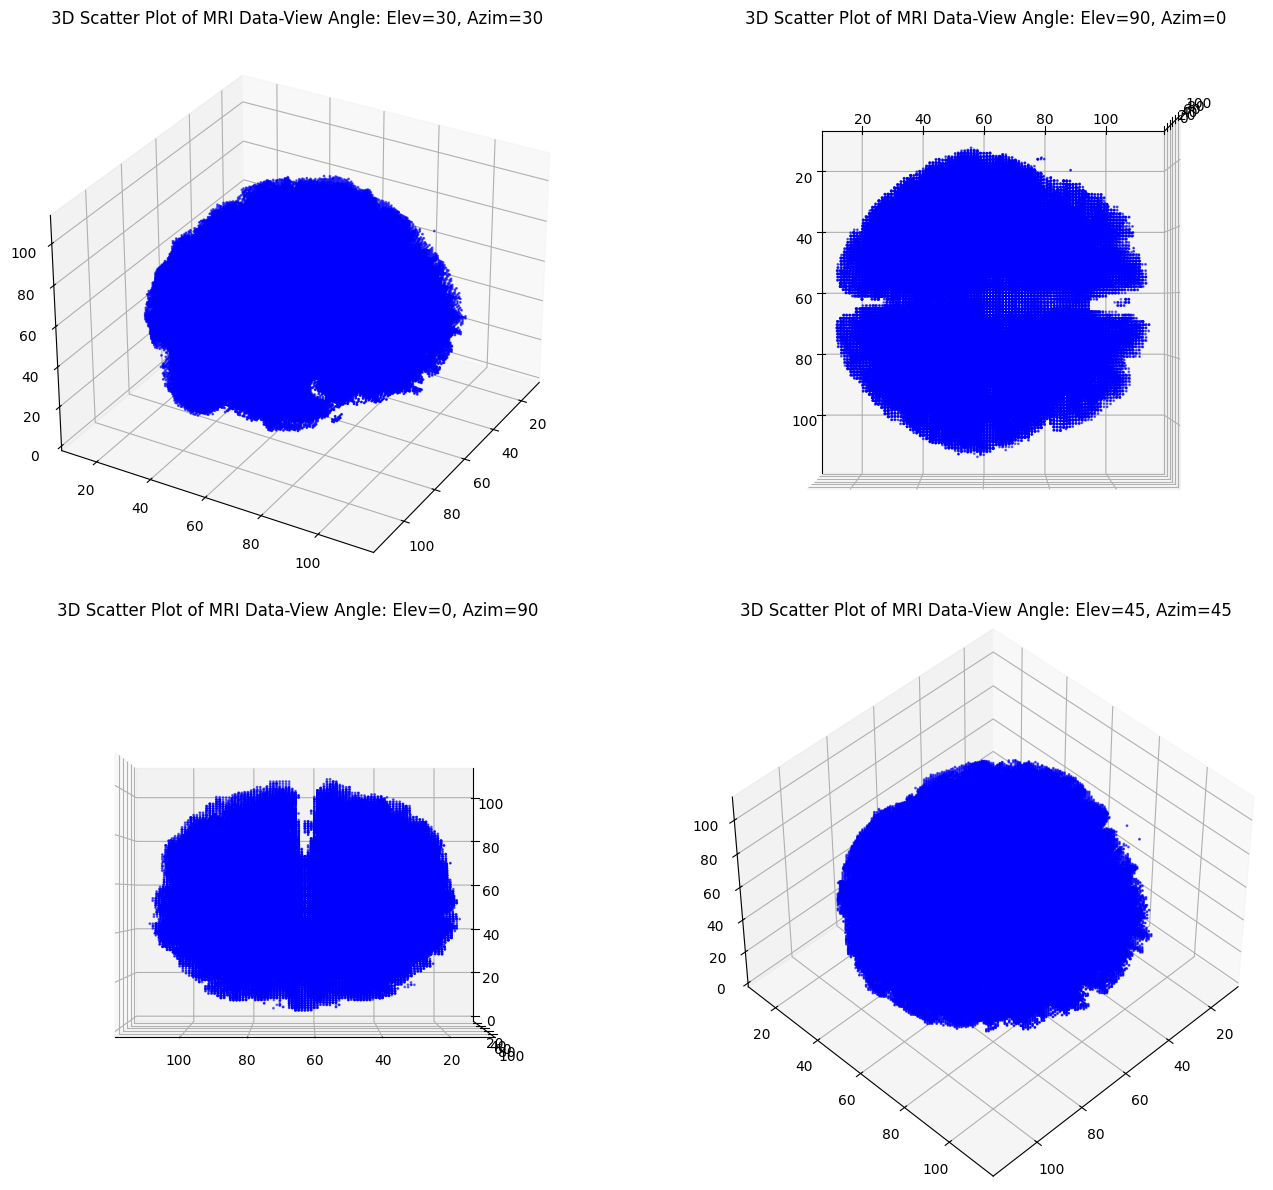

In [32]:
test_x = test_x.squeeze(1)  # 形状变为(5, 128, 128, 128)
data = test_x[0]  # 第一个样本

x, y, z = np.where(data > 0.5)
view_angles = [
    (30, 30),  # 俯视角度
    (90, 0),   # 正面
    (0, 90),   # 侧面
    (45, 45),  # 对角线
]

# 创建多个子图
fig = plt.figure(figsize=(15, 12))

for i, (elev, azim) in enumerate(view_angles):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.scatter(x, y, z, c='b', marker='o', s=1)  # 点的大小设为1，以避免图像过于拥挤
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"3D Scatter Plot of MRI Data-View Angle: Elev={elev}, Azim={azim}")

plt.tight_layout()
plt.show()

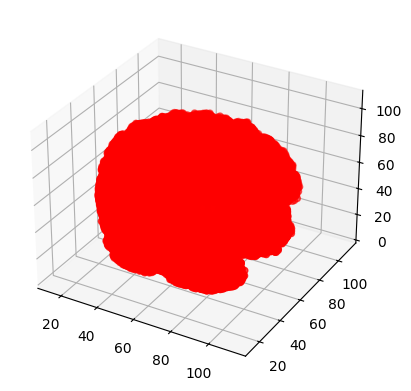

In [17]:
test_x = test_x.squeeze(1)
data = test_x[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.where(data > 0.5)
ax.scatter(x, y, z, c='r', marker='o')

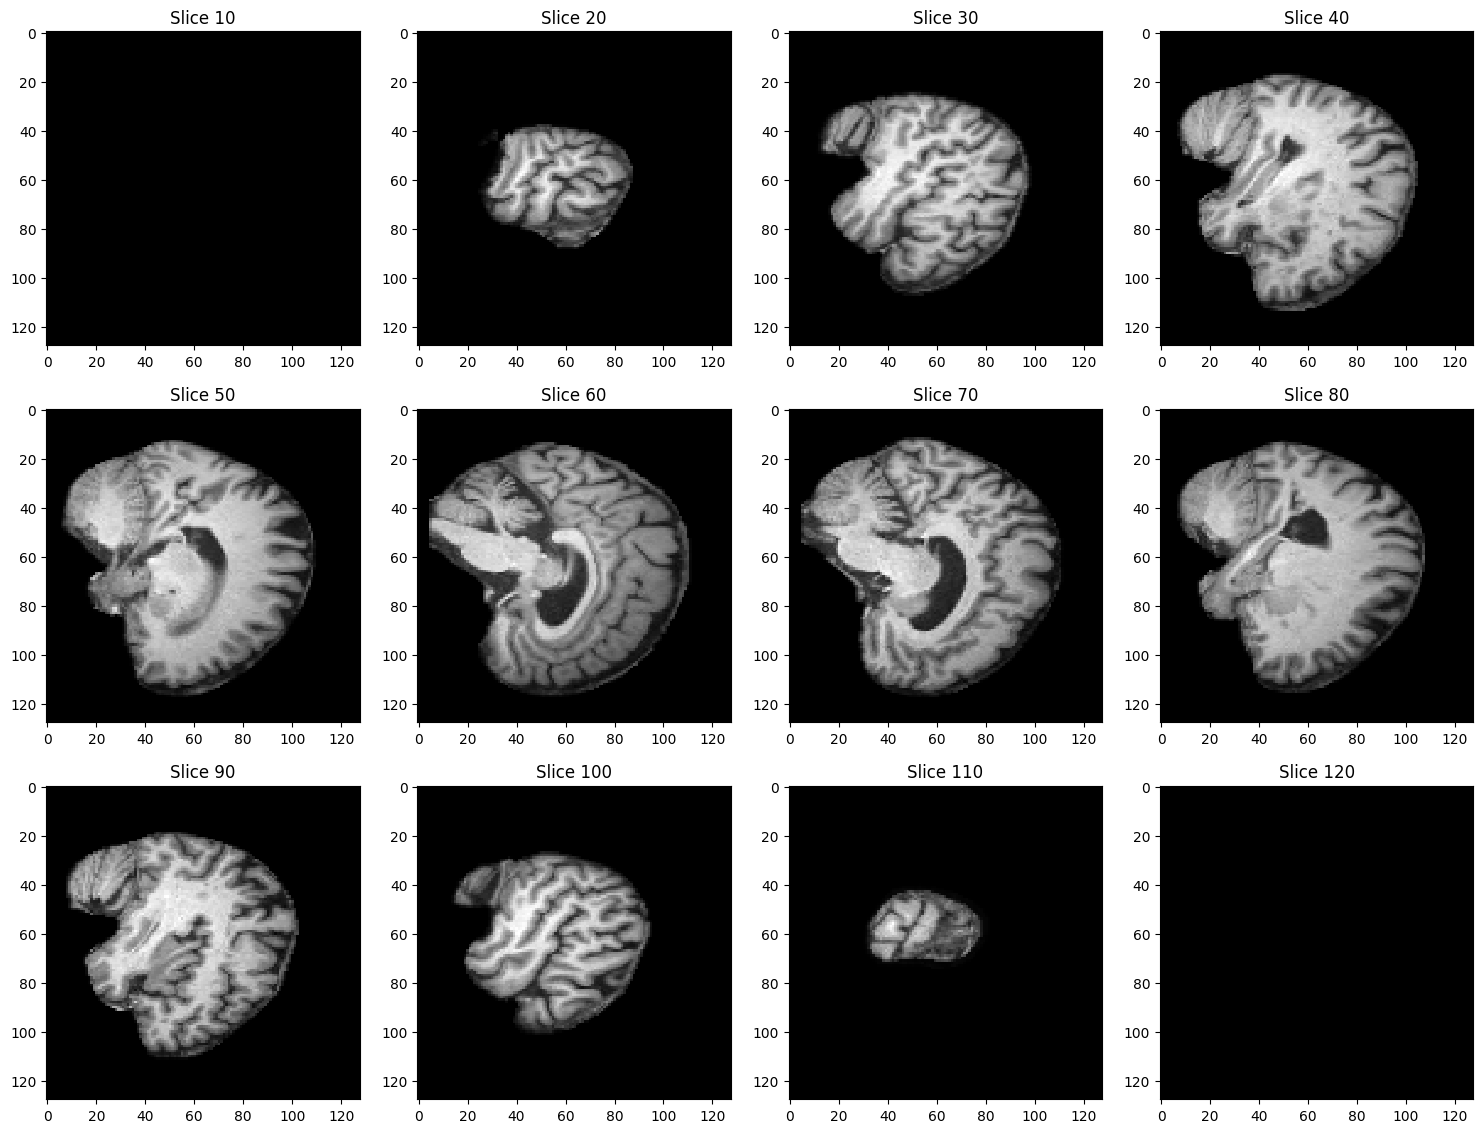

In [10]:
fig = plt.figure(figsize=(15, 15))
for i in range(10, 128, 10):
    ax = fig.add_subplot(4, 4, i//10)
    ax.imshow(data[i,:, :], cmap='gray', interpolation='nearest')
    ax.set_title(f'Slice {i}')
    ax.axis('on')
plt.tight_layout()
plt.show()
# 第一个轴方向是矢状面（Sagittal）的MRI， 在Vision transformer里面作为frame， 是否合适呢？

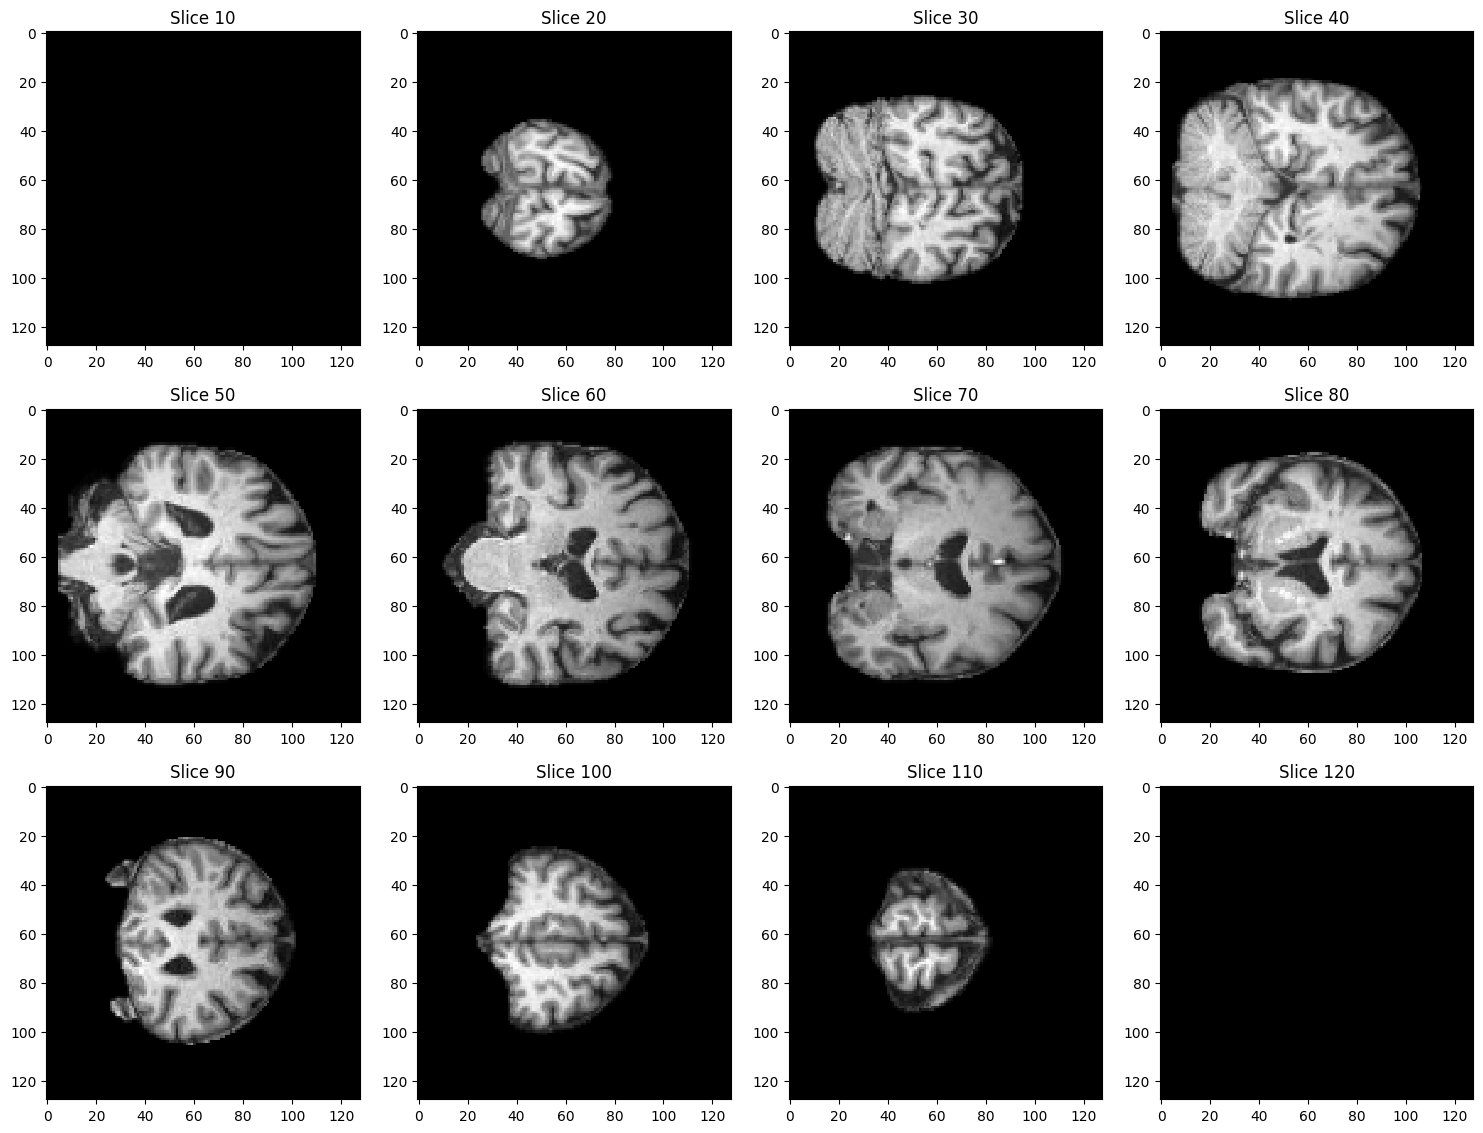

In [11]:
fig = plt.figure(figsize=(15, 15))
for i in range(10, 121, 10):
    ax = fig.add_subplot(4, 4, i//10)
    ax.imshow(data[:, i, :], cmap='gray', interpolation='nearest')
    ax.set_title(f'Slice {i}')
    ax.axis('on')
plt.tight_layout()
plt.show()
#第二个维度是冠状面

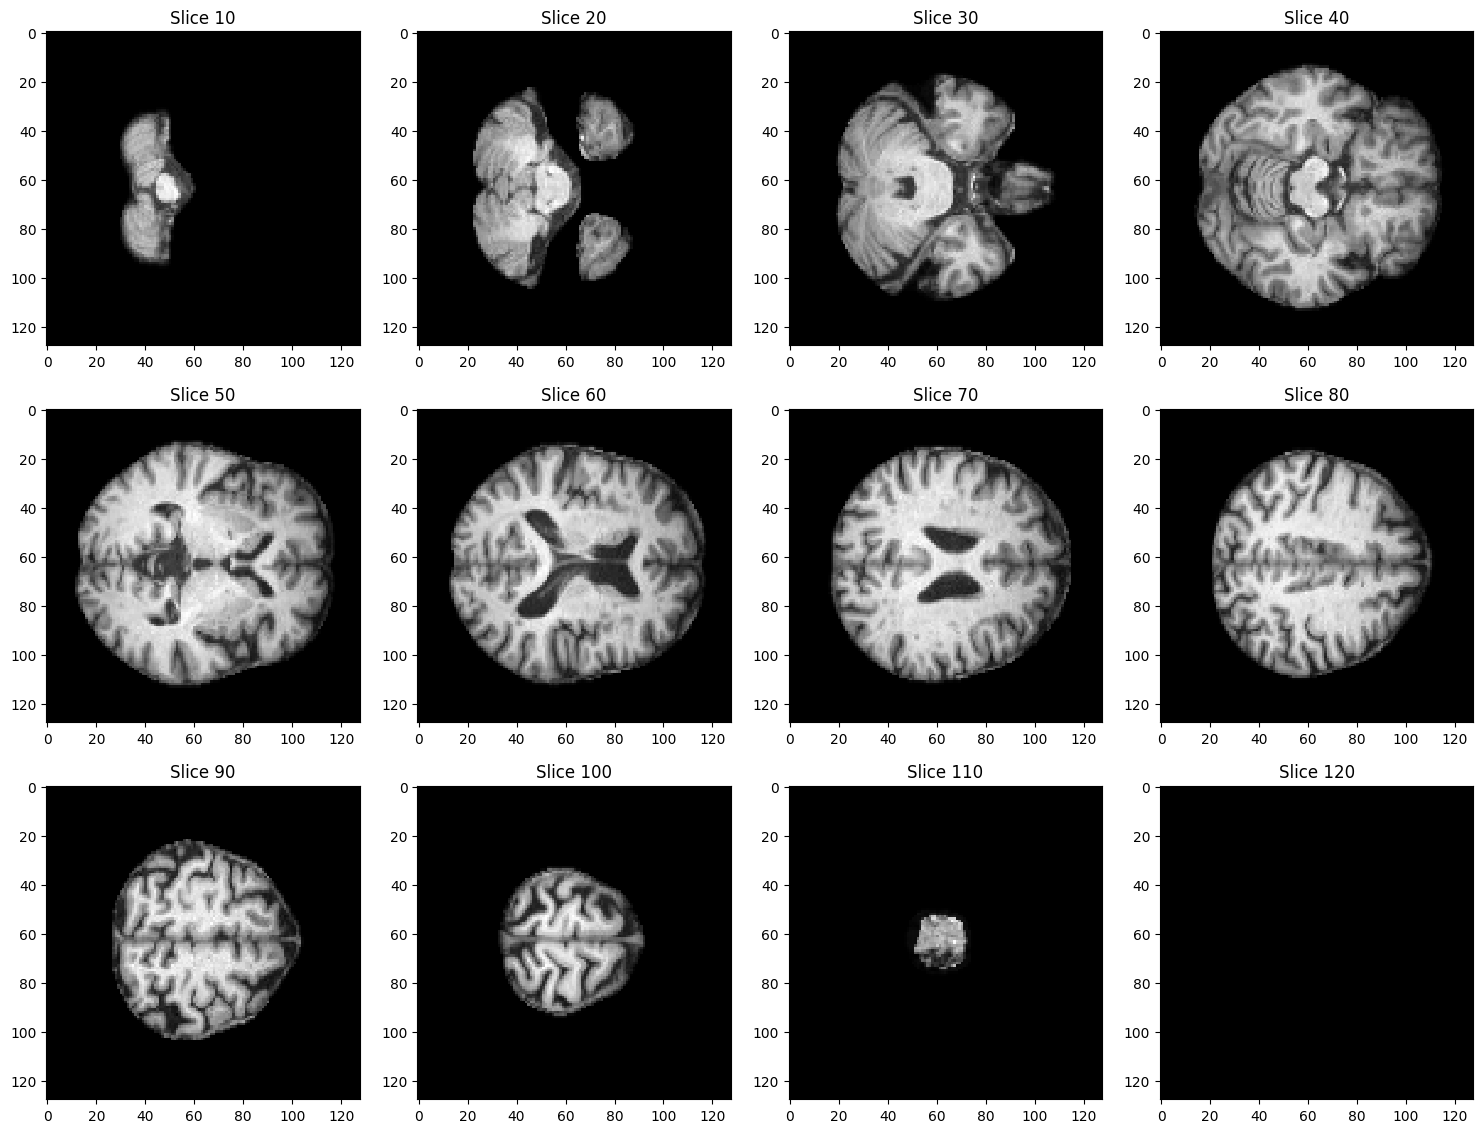

In [12]:
fig = plt.figure(figsize=(15, 15))
for i in range(10, 128, 10):
    ax = fig.add_subplot(4, 4, i//10)
    ax.imshow(data[:, :, i], cmap='gray', interpolation='nearest')
    ax.set_title(f'Slice {i}')
    ax.axis('on')

plt.tight_layout()
plt.show()
# 第三个维度是横断面， 轴向（Axial)